In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
company_data = pd.read_csv("D:\MIT ADT\Third Year - Sem 2\ML LAB\Assign 4\Company_Data.csv")
tvmarketing = pd.read_csv("D:\MIT ADT\Third Year - Sem 2\ML LAB\Assign 4/tvmarketing.csv")


In [55]:
tvmarketing.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

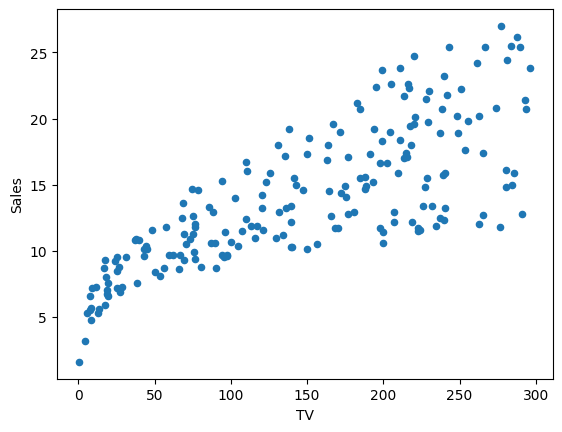

In [56]:
tvmarketing.plot(x="TV", y="Sales", kind="scatter")

In [57]:
#linear regression

#y=c + m1x1+ m2x2+....mnxn
#y(sales) = c + w1*TV

In [58]:
X = tvmarketing["TV"]
y = tvmarketing["Sales"]#output

In [59]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=0)

In [60]:
print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

#we need to resharpe the train as we need to pass 2d to model

(160,) (160,)
(40,) (40,)


In [61]:
lr = LinearRegression()  

In [62]:
Xtrain = np.expand_dims(Xtrain, 1)
Xtest = np.expand_dims(Xtest,1)

In [63]:
print(Xtrain.shape)
print(Xtest.shape)

(160, 1)
(40, 1)


In [64]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [65]:
print(lr.intercept_)
print(lr.coef_)

7.292493773559356
[0.04600779]


y(sales) = 0.046*x(tv) + 7.29

In [66]:
lr.score(Xtrain, ytrain)

0.5884742462828709

In [67]:
lr.score(Xtest, ytest)

0.6763151577939723

In [68]:
y_pred = lr.predict(Xtest)

<module 'matplotlib.pyplot' from 'c:\\Users\\nilesh\\anaconda3\\envs\\mllab\\lib\\site-packages\\matplotlib\\pyplot.py'>

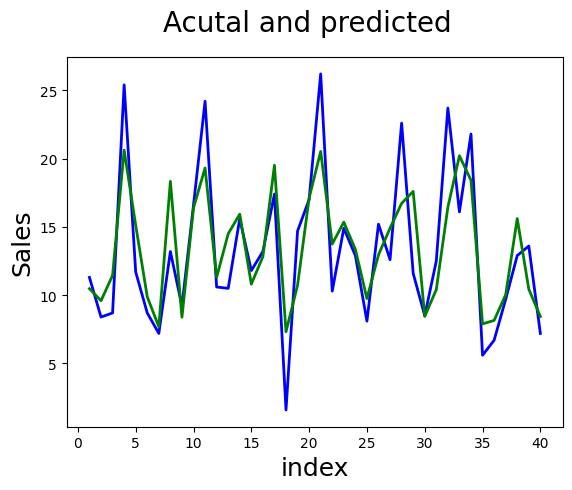

In [69]:
c = [i for i in range(1,41,1)]
fig = plt.figure()

plt.plot(c, ytest, color="blue", linewidth = 2, linestyle="-")
plt.plot(c, y_pred, color="green", linewidth = 2, linestyle="-")

fig.suptitle("Acutal and predicted", fontsize=20)
plt.xlabel(("index"), fontsize= 18)
plt.ylabel(("Sales"), fontsize= 18)

plt

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

mse  = mean_squared_error(ytest, y_pred)
print(mse) #smaller the value better the accuracy

10.186181934530211


In [71]:
r2s = r2_score(ytest, y_pred)
print(r2s)

0.6763151577939723


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain = scaler.fit_transform(Xtrain)

Xtest = scaler.fit_transform(Xtest)

lr.fit(Xtrain, ytrain)

#y_pred = lr.predict(Xtest)

print(mean_squared_error(ytest, y_pred))

print(r2_score(ytest,y_pred))

10.186181934530211
0.6763151577939723


MLP REGRESSOR

In [102]:
from sklearn.neural_network import MLPRegressor

mlp_r = MLPRegressor(hidden_layer_sizes=(10,),activation='identity', solver='sgd',verbose=True, max_iter=60)
mlp_r

MLPRegressor(activation='identity', hidden_layer_sizes=(10,), max_iter=60,
             solver='sgd', verbose=True)

In [103]:
mlp_r.fit(Xtrain, ytrain)

Iteration 1, loss = 99.52602069
Iteration 2, loss = 97.88034186
Iteration 3, loss = 95.54374326
Iteration 4, loss = 92.59190605
Iteration 5, loss = 89.08971094
Iteration 6, loss = 85.09143886
Iteration 7, loss = 80.64235963
Iteration 8, loss = 75.78166789
Iteration 9, loss = 70.54660916
Iteration 10, loss = 64.97753410
Iteration 11, loss = 59.12350223
Iteration 12, loss = 53.04791101
Iteration 13, loss = 46.83344896
Iteration 14, loss = 40.58548421
Iteration 15, loss = 34.43285365
Iteration 16, loss = 28.52499856
Iteration 17, loss = 23.02460702
Iteration 18, loss = 18.09547165
Iteration 19, loss = 13.88619070
Iteration 20, loss = 10.51154092
Iteration 21, loss = 8.03456451
Iteration 22, loss = 6.45321024
Iteration 23, loss = 5.69528210
Iteration 24, loss = 5.62418103
Iteration 25, loss = 6.05558853
Iteration 26, loss = 6.78243989
Iteration 27, loss = 7.60321606
Iteration 28, loss = 8.34763534
Iteration 29, loss = 8.89464534
Iteration 30, loss = 9.17989063
Iteration 31, loss = 9.192688

MLPRegressor(activation='identity', hidden_layer_sizes=(10,), max_iter=60,
             solver='sgd', verbose=True)

In [105]:
y_pred1 = mlp_r.predict(Xtest)

Text(0, 0.5, 'Sales')

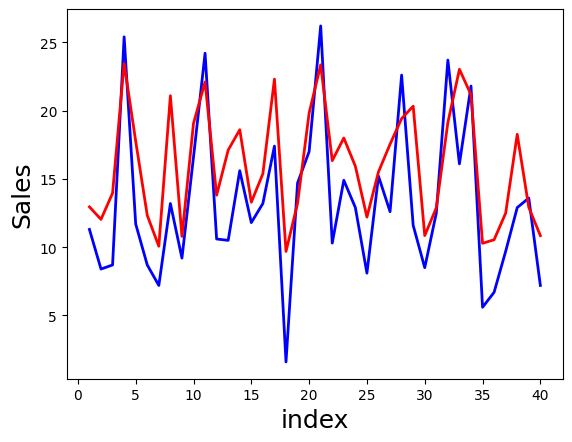

In [106]:
plt.plot(c, ytest, color="blue", linewidth = 2, linestyle="-")
plt.plot(c, y_pred1, color="red", linewidth = 2, linestyle="-")

fig.suptitle("Acutal and predicted", fontsize=20)
plt.xlabel(("index"), fontsize= 18)
plt.ylabel(("Sales"), fontsize= 18)

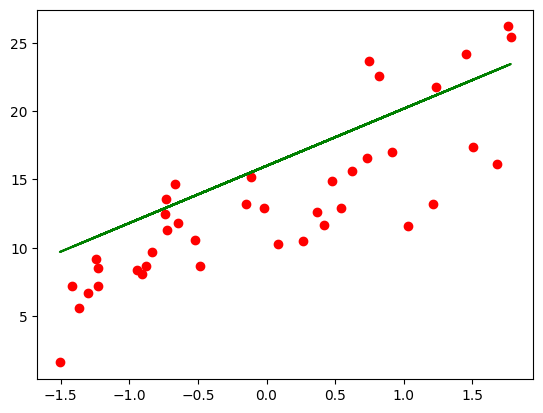

In [107]:
plt.scatter(Xtest, ytest, color = 'r')

plt.plot(Xtest, y_pred1, color = 'g')
